In [4]:
import numpy as np
from sklearn import model_selection, neighbors, metrics, linear_model, ensemble, svm, impute, tree
import csv
import pickle

In [5]:
!wget https://raw.githubusercontent.com/tahseenbt/Predicting-a-pulsar-star/main/data.csv

--2020-10-24 00:15:19--  https://raw.githubusercontent.com/tahseenbt/Predicting-a-pulsar-star/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730114 (1.6M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.65M  9.24MB/s    in 0.2s    

2020-10-24 00:15:20 (9.24 MB/s) - ‘data.csv.1’ saved [1730114/1730114]



In [6]:
with open('data.csv') as csv_file:
  csv_reader = csv.reader(csv_file)
  data = list(csv_reader)
X = []
y=[]
for d in data:
  X.append(list(map(float, d[:-1])))
  y.append(int(''.join(d[-1:])))
# print(X)
# print(y)
# test for no entries and fix it by placing the mean value there
# imp = impute.SimpleImputer(strategy='mean')
# imp.fit(X)
# print(imp.transform(X).tolist == X)

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, stratify=y)

before tuning with n_neighbors=3 and other default parameters:
0.9803824186739508
0.9681564245810056
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.92      0.71      0.80       164

    accuracy                           0.97      1790
   macro avg       0.95      0.85      0.89      1790
weighted avg       0.97      0.97      0.97      1790



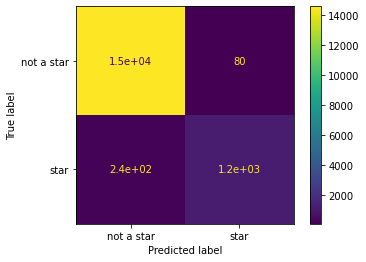

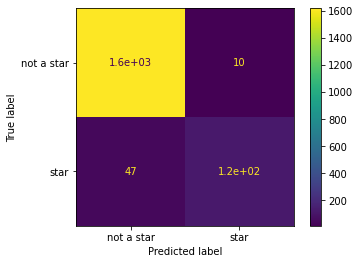

In [ ]:
print("before tuning with n_neighbors=3 and other default parameters:")
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(neigh, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(neigh, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

tuning hyperparameters:
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.7min finished


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
1.0
0.9715083798882681
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1626
           1       0.95      0.73      0.82       164

    accuracy                           0.97      1790
   macro avg       0.96      0.86      0.90      1790
weighted avg       0.97      0.97      0.97      1790



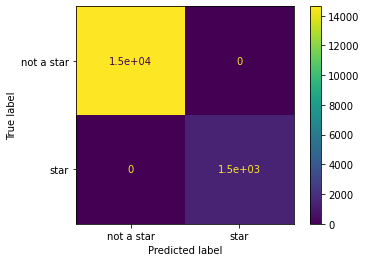

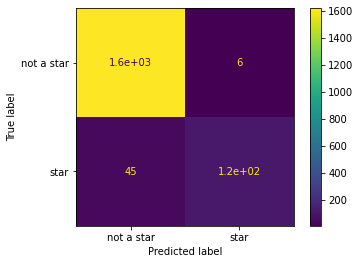

In [ ]:
print("finding KNN with the best hyperparameters:")
neigh = neighbors.KNeighborsClassifier()
grid_params = {'n_neighbors': range(20), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
neigh = model_selection.GridSearchCV(neigh, grid_params, verbose=3, n_jobs=-1)
neigh.fit(X_train, y_train)
print(neigh.best_params_)
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(neigh, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(neigh, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

before tuning Logistic Regression with default parameters:
0.979575366277626
0.9731843575418995
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1626
           1       0.95      0.74      0.84       164

    accuracy                           0.97      1790
   macro avg       0.96      0.87      0.91      1790
weighted avg       0.97      0.97      0.97      1790



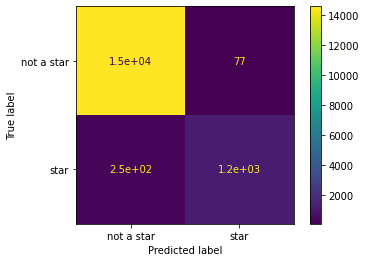

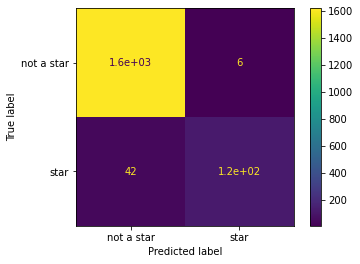

In [ ]:
print("before tuning Logistic Regression with default parameters:")
lr = linear_model.LogisticRegression(max_iter=len(X_train))
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(lr, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

finding logistic regression with the best hyperparameters:
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.9s finished


{'C': 46.41588833612782, 'penalty': 'l2'}
0.9796995281847529
0.9743016759776536
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.95      0.76      0.84       164

    accuracy                           0.97      1790
   macro avg       0.96      0.88      0.91      1790
weighted avg       0.97      0.97      0.97      1790



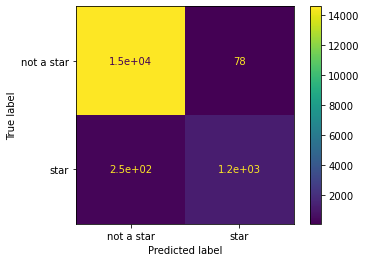

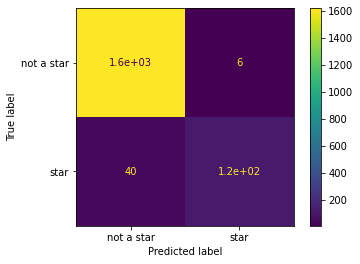

In [ ]:
print("finding logistic regression with the best hyperparameters:")
lr = linear_model.LogisticRegression(max_iter=len(X_train))
grid_params = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-5, 5, 10)}
lr = model_selection.GridSearchCV(lr, grid_params, verbose=3, n_jobs=-1)
lr.fit(X_train, y_train)
print(lr.best_params_)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(lr, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

before tuning RFC with default parameters:
1.0
0.9782122905027933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.96      0.80      0.87       164

    accuracy                           0.98      1790
   macro avg       0.97      0.90      0.93      1790
weighted avg       0.98      0.98      0.98      1790



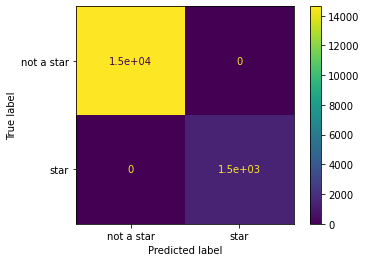

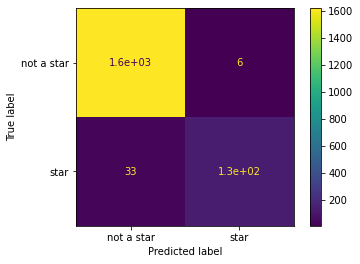

In [ ]:
print("before tuning RFC with default parameters:")
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(rfc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(rfc, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

finding RFC with the best hyperparameters:
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 55.1min finished


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 600}
0.9898808045691582
0.9782122905027933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1626
           1       0.96      0.80      0.87       164

    accuracy                           0.98      1790
   macro avg       0.97      0.90      0.93      1790
weighted avg       0.98      0.98      0.98      1790



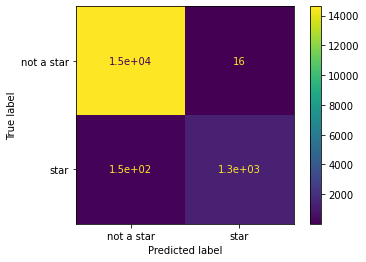

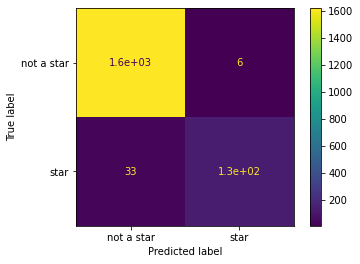

In [ ]:
print("finding RFC with the best hyperparameters:")
rfc = ensemble.RandomForestClassifier(n_estimators = 100)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
rfc = model_selection.GridSearchCV(rfc, grid_params, verbose=3, n_jobs=-1)
rfc.fit(X_train, y_train)
print(rfc.best_params_)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(rfc, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(rfc, X_test, y_test, display_labels=["not a star", "star"])
print(metrics.classification_report(y_test, y_test_pred))

0.9734914328284082
0.9670391061452513


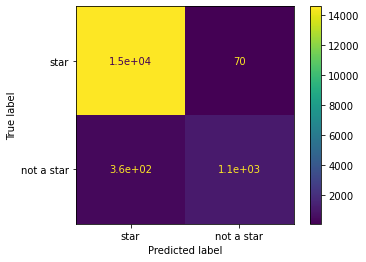

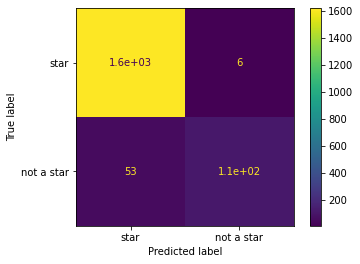

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(svm_clf, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(svm_clf, X_test, y_test, display_labels=["not a star", "star"])

1.0
0.9659217877094972


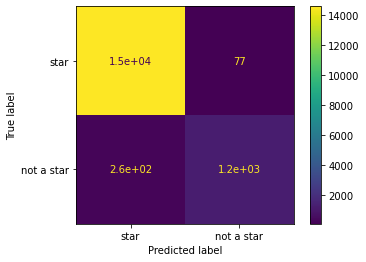

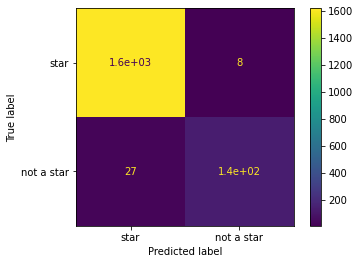

In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_test_pred))
metrics.plot_confusion_matrix(lr, X_train, y_train, display_labels=["not a star", "star"])
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=["not a star", "star"])